## Pipeline to solve Leap Motion dataset

#### Author: Dmitrii Shumilin

It is learning system for hand-written digits 0, 1, ..., 9. The digits are “written” as
free-hand strokes in the air with the index finger, and the 3-D location information of the finger tip has
been read by using a LeapMotion sensor. The purpose of the system is to recognise the hand-written
digits, that is, to classify them correctly based on the 3-D location time series

Import needed library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.notebook import tqdm
import pickle

Import creaded functions and classes to solve the problem

In [2]:
from dataset import dataset_pictures, files_to_pictures, inference_file_to_picture, inference_picture
from preprocessing import train_test_split, StandardScaler, one_hot_encoding
from model import NeuralNet

Set directory with training csv files

In [3]:
TRAIN_DIR = Path('training_data/')
SEED = 2020

Makes list of file paths and labels of pictures by parsing file names.

In [4]:
files = sorted(list(TRAIN_DIR.rglob('*.csv')))
labels = np.array([int(files[indx].name.split('_')[1]) for indx in range(len(files))])

Convert dataset in to 36x36 png pictures

In [5]:
# files_to_pictures(files)

Load these pictures and make them flat. Stack them in to one matrix with shape 1000x1296.It will be our dataset.

In [6]:
dataset = dataset_pictures(files)

Converting our labels in to one-hot representation

In [7]:
y_ohe = one_hot_encoding(labels)

Split dataset on train and test set with proportion 0.2. In order not to add a leak to the test dataset about the mean and standard deviation, we scale the training dataset and apply the resulting transformation to the test one. To do the same at the inference stage, save the parameters of the mean and standard deviation in a pickle file

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y_ohe, shuffle=True, test_proportion=0.1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

params = {'means': scaler.mean,
          'std': scaler.std}

with open('scaler_params.pickle', 'wb') as file:
    pickle.dump(params, file, protocol=pickle.HIGHEST_PROTOCOL)

Neural net architecture already defined. Here is 2 layer MLP network with 64 neurons in hidden layer.

In [9]:
net = NeuralNet(1296, random_state=SEED)

Define function for training process. Weights of model will be saved if accuracy on test dataset increasing.

In [10]:
def train_model(X_train, X_test, y_train, y_test, epochs, lr = 0.0001, plots=True):
    for _ in tqdm(range(epochs)):
        accuracy_val = net.validate_step(X_test, y_test, 'val')
        net.check_and_save(accuracy_val)
        out = net.forward_step(X_train, y_train)
        accuracy_train = net.validate_step(X_train, y_train, 'train')
        print(f'Train accuracy: {accuracy_train}, Val accuracy: {accuracy_val}, Best accuracy: {net.max_acc}')
        net.backward_step(out, y_train, lr, 200)
        
    if plots:
        fig, ax = plt.subplots(1,2,figsize=(15,5))
        ax[0].plot(net.history)
        ax[0].set_title('Learning curve')
        ax[0].set_xlabel('Epoch')
        ax[0].set_ylabel('Loss')

        ax[1].plot(net.accuracy_train, label = 'Train')
        ax[1].plot(net.accuracy_valid, label = 'Valid')
        ax[1].legend()
        ax[1].set_title('Model accuracy')
        ax[1].set_xlabel('Epoch')
        ax[1].set_ylabel('Accuracy')

Take a cup of coffee and relax while training process :)

Train accuracy: 0.09666666666666666, Val accuracy: 0.13, Best accuracy: 0.13
Train accuracy: 0.21222222222222223, Val accuracy: 0.26, Best accuracy: 0.26
Train accuracy: 0.34, Val accuracy: 0.36, Best accuracy: 0.36
Train accuracy: 0.46444444444444444, Val accuracy: 0.45, Best accuracy: 0.45
Train accuracy: 0.5655555555555556, Val accuracy: 0.54, Best accuracy: 0.54
Train accuracy: 0.6522222222222223, Val accuracy: 0.64, Best accuracy: 0.64
Train accuracy: 0.7155555555555555, Val accuracy: 0.7, Best accuracy: 0.7
Train accuracy: 0.7566666666666667, Val accuracy: 0.71, Best accuracy: 0.71
Train accuracy: 0.7922222222222223, Val accuracy: 0.76, Best accuracy: 0.76
Train accuracy: 0.8211111111111111, Val accuracy: 0.79, Best accuracy: 0.79
Train accuracy: 0.8388888888888889, Val accuracy: 0.82, Best accuracy: 0.82
Train accuracy: 0.8544444444444445, Val accuracy: 0.85, Best accuracy: 0.85
Train accuracy: 0.8666666666666667, Val accuracy: 0.85, Best accuracy: 0.85
Train accuracy: 0.8788888

Train accuracy: 0.9455555555555556, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9455555555555556, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9455555555555556, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9455555555555556, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9455555555555556, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9455555555555556, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9455555555555556, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9455555555555556, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9455555555555556, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9455555555555556, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9455555555555556, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9455555555555556, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9455555555555556, Val accuracy: 0.95, Best accuracy: 0.95
Train accura

Train accuracy: 0.9477777777777778, Val accuracy: 0.94, Best accuracy: 0.95
Train accuracy: 0.9477777777777778, Val accuracy: 0.94, Best accuracy: 0.95
Train accuracy: 0.9477777777777778, Val accuracy: 0.94, Best accuracy: 0.95
Train accuracy: 0.9477777777777778, Val accuracy: 0.94, Best accuracy: 0.95
Train accuracy: 0.9477777777777778, Val accuracy: 0.94, Best accuracy: 0.95
Train accuracy: 0.9477777777777778, Val accuracy: 0.94, Best accuracy: 0.95
Train accuracy: 0.9477777777777778, Val accuracy: 0.94, Best accuracy: 0.95
Train accuracy: 0.9477777777777778, Val accuracy: 0.94, Best accuracy: 0.95
Train accuracy: 0.9477777777777778, Val accuracy: 0.94, Best accuracy: 0.95
Train accuracy: 0.9477777777777778, Val accuracy: 0.94, Best accuracy: 0.95
Train accuracy: 0.9477777777777778, Val accuracy: 0.94, Best accuracy: 0.95
Train accuracy: 0.9477777777777778, Val accuracy: 0.94, Best accuracy: 0.95
Train accuracy: 0.9477777777777778, Val accuracy: 0.94, Best accuracy: 0.95
Train accura

Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accura

Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.95
Train accura

Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accura

Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accura

Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accura

Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accura

Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9455555555555556, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9455555555555556, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9455555555555556, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9455555555555556, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9455555555555556, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9455555555555556, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9455555555555556, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9455555555555556, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9455555555555556, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9455555555555556, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9455555555555556, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9455555555555556, Val accuracy: 0.96, Best accuracy: 0.96
Train accura

Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accura

Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.95, Best accuracy: 0.96
Train accura

Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9466666666666667, Val accuracy: 0.96, Best accuracy: 0.96
Train accura

Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accura

Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accura

Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accura

Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accura

Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accura

Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accuracy: 0.9477777777777778, Val accuracy: 0.96, Best accuracy: 0.96
Train accura

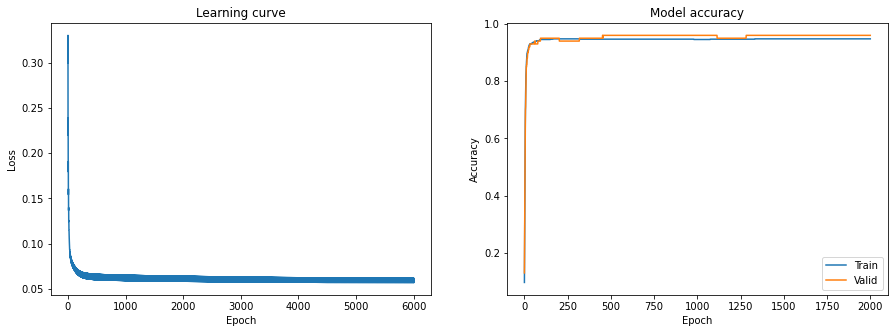

In [11]:
train_model(X_train, X_test, y_train, y_test, 2000, plots=True)

Testing weights for new model exemplar

In [12]:
net_test = NeuralNet(1296, random_state=2020)
accuracy_val = net_test.validate_step(X_test, y_test, 'val')
accuracy_val

0.13

In [13]:
net_test.load_weights()
accuracy_val = net_test.validate_step(X_test, y_test, 'val')
accuracy_val

0.96

Test inference process

In [14]:
inference_file_name = 'training_data/stroke_7_0015.csv'
inference_path = inference_file_to_picture(inference_file_name)
inference_png = inference_picture(inference_path)
prediction = net_test.forward_step(inference_png, _, mode='inference')

In [15]:
print(prediction[0])

7


Make model for inference!

In [23]:
inference_net = NeuralNet(1296, random_state=SEED)

In [24]:
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)

params = {'means': scaler.mean,
          'std': scaler.std}

with open('scaler_params.pickle', 'wb') as file:
    pickle.dump(params, file, protocol=pickle.HIGHEST_PROTOCOL)

In [25]:
def train_model(X, y_ohe, epochs, plots=True):
    for _ in tqdm(range(epochs)):
        accuracy_val = inference_net.validate_step(X, y_ohe, 'val')
        inference_net.check_and_save(accuracy_val)
        out = inference_net.forward_step(X, y_ohe)
        accuracy_train = inference_net.validate_step(X, y_ohe, 'train')
        print(f'Train accuracy: {accuracy_train}, Val accuracy: {accuracy_val}, Best accuracy: {inference_net.max_acc}')
        inference_net.backward_step(out, y_ohe, 0.0001, 200)
        
    if plots:
        fig, ax = plt.subplots(1,2,figsize=(15,5))
        ax[0].plot(inference_net.history)
        ax[0].set_title('Learning curve')
        ax[0].set_xlabel('Epoch')
        ax[0].set_ylabel('Loss')

        ax[1].plot(inference_net.accuracy_train, label = 'Train')
        ax[1].plot(inference_net.accuracy_valid, label = 'Valid')
        ax[1].legend()
        ax[1].set_title('Model accuracy')
        ax[1].set_xlabel('Epoch')
        ax[1].set_ylabel('Accuracy')

Train accuracy: 0.101, Val accuracy: 0.101, Best accuracy: 0.101
Train accuracy: 0.231, Val accuracy: 0.231, Best accuracy: 0.231
Train accuracy: 0.375, Val accuracy: 0.375, Best accuracy: 0.375
Train accuracy: 0.494, Val accuracy: 0.494, Best accuracy: 0.494
Train accuracy: 0.614, Val accuracy: 0.614, Best accuracy: 0.614
Train accuracy: 0.691, Val accuracy: 0.691, Best accuracy: 0.691
Train accuracy: 0.739, Val accuracy: 0.739, Best accuracy: 0.739
Train accuracy: 0.786, Val accuracy: 0.786, Best accuracy: 0.786
Train accuracy: 0.812, Val accuracy: 0.812, Best accuracy: 0.812
Train accuracy: 0.838, Val accuracy: 0.838, Best accuracy: 0.838
Train accuracy: 0.853, Val accuracy: 0.853, Best accuracy: 0.853
Train accuracy: 0.871, Val accuracy: 0.871, Best accuracy: 0.871
Train accuracy: 0.88, Val accuracy: 0.88, Best accuracy: 0.88
Train accuracy: 0.886, Val accuracy: 0.886, Best accuracy: 0.886
Train accuracy: 0.893, Val accuracy: 0.893, Best accuracy: 0.893
Train accuracy: 0.9, Val acc

Train accuracy: 0.949, Val accuracy: 0.949, Best accuracy: 0.949
Train accuracy: 0.949, Val accuracy: 0.949, Best accuracy: 0.949
Train accuracy: 0.949, Val accuracy: 0.949, Best accuracy: 0.949
Train accuracy: 0.949, Val accuracy: 0.949, Best accuracy: 0.949
Train accuracy: 0.949, Val accuracy: 0.949, Best accuracy: 0.949
Train accuracy: 0.949, Val accuracy: 0.949, Best accuracy: 0.949
Train accuracy: 0.949, Val accuracy: 0.949, Best accuracy: 0.949
Train accuracy: 0.949, Val accuracy: 0.949, Best accuracy: 0.949
Train accuracy: 0.949, Val accuracy: 0.949, Best accuracy: 0.949
Train accuracy: 0.949, Val accuracy: 0.949, Best accuracy: 0.949
Train accuracy: 0.949, Val accuracy: 0.949, Best accuracy: 0.949
Train accuracy: 0.949, Val accuracy: 0.949, Best accuracy: 0.949
Train accuracy: 0.949, Val accuracy: 0.949, Best accuracy: 0.949
Train accuracy: 0.949, Val accuracy: 0.949, Best accuracy: 0.949
Train accuracy: 0.949, Val accuracy: 0.949, Best accuracy: 0.949
Train accuracy: 0.949, Va

Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Va

Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Val accuracy: 0.951, Best accuracy: 0.951
Train accuracy: 0.951, Va

Train accuracy: 0.952, Val accuracy: 0.952, Best accuracy: 0.952
Train accuracy: 0.952, Val accuracy: 0.952, Best accuracy: 0.952
Train accuracy: 0.952, Val accuracy: 0.952, Best accuracy: 0.952
Train accuracy: 0.952, Val accuracy: 0.952, Best accuracy: 0.952
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Va

Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.952, Val accuracy: 0.952, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Va

Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Va

Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Val accuracy: 0.953, Best accuracy: 0.953
Train accuracy: 0.953, Va

Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Va

Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Va

Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Va

Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Va

Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Va

Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Va

Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.954
Train accuracy: 0.954, Va

Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.955
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.955
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.955
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.955
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.955
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.955
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.955
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.955
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.955
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.955
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.955
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.955
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.955
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.955
Train accuracy: 0.954, Val accuracy: 0.954, Best accuracy: 0.955
Train accuracy: 0.954, Va

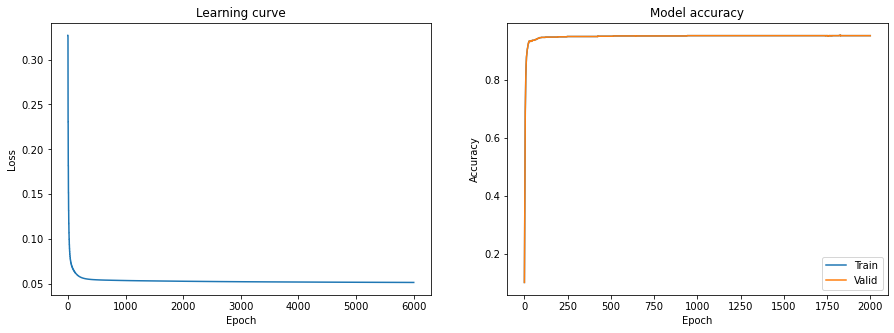

In [26]:
train_model(dataset_scaled, y_ohe, 2000, plots=True)